# How much does contfunc dependents contribute to the overall LAS?

We are interested in looking at the contribution of functional dependents to the overall LAS score. To do this, we look at the correlation between the LAS score of functional dependency classes, plotted against the frequency ratio of the dependency class. If there is a correlation between how common the dependency class is in the language and how common the class is, we can draw the conclusion that the more common functional dependencies are in a language, the easier it is to parse.

We also expect that such a correlation cannot be found in content classes.

## Summary

There is such a correlation for the functional dependency class, and we lack the same correlation for content classes.

In [34]:
# Matplotlib
%matplotlib inline
import matplotlib as mpl
from matplotlib import pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 7.0)
mpl.style.use('ggplot')
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pgf', FigureCanvasPgf)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import sys, os
from os.path import join
sys.path.append("../tools/")
from collections import defaultdict

# Data management libraries
import pandas as pd
#import seaborn as sns

# Treebank utils, found in "../tools"
import udeval, udtree, lang_utils, dependency_classes

is_labeled = True
is_fine_grained_deprels = False
file_format = "conllx"
test_type = "test"

system_output_base = "/Users/jimmy/dev/edu/nlp-rod/udeval/resources/maltdefault_coarse_output_test_1-2/"
gold_output_base = "/Users/jimmy/dev/edu/nlp-rod/udeval/resources/universaldependencies1-2/universal-dependencies-1.2/"
file_prefix = "maltdefault"

system_files = lang_utils.get_system_output_paths(system_output_base, type_=test_type, format_=file_format)
gold_files = lang_utils.get_ud_paths(gold_output_base, type_=test_type, format_=file_format, coarse=True)

In [41]:
las = pd.Series.from_csv('../data/' + file_prefix + '.las.csv')
content_function_precision_recall = pd.DataFrame.from_csv('../data/' + file_prefix + '.content_function.precision_recall.csv', header=[0,1])
content_function_precision_recall

Content            Function           Nonsemantic  \
                    precision    recall precision    recall   precision   
Arabic               0.716505  0.725658  0.825058  0.810317    0.779388   
Basque               0.574014  0.600554  0.857873  0.823987    0.684042   
Bulgarian            0.772891  0.776560  0.921854  0.916795    0.818064   
Croatian             0.674652  0.687672  0.820272  0.814315    0.637931   
Czech                0.778110  0.796339  0.890820  0.875164    0.746595   
Danish               0.690546  0.714676  0.898154  0.879813    0.728411   
Dutch                0.571343  0.631405  0.844731  0.791076    0.648472   
English              0.784849  0.790791  0.921443  0.919656    0.775000   
Finnish              0.631938  0.635584  0.761481  0.762046    0.711940   
Gothic               0.616835  0.614317  0.804772  0.812409    0.732759   
Greek                0.651053  0.679462  0.894201  0.867292    0.619962   
Hebrew               0.697012  0.716423  0.922227  0.923529    0.690780   
Hindi                0.807023  0.814800  0.963245  0.962782    0.956348   
Italian              0.771964  0.774656  0.954366  0.954995    0.741564   
Norwegian            0.803790  0.803504  0.916245  0.931639    0.843332   
Old_Church_Slavonic  0.658627  0.666220  0.852444  0.836824    0.834254   
Persian              0.758404  0.769813  0.900920  0.880674    0.756857   
Polish               0.803204  0.804598  0.907010  0.903134    0.861301   
Portuguese           0.712555  0.730000  0.948301  0.941988    0.665428   
Slovenian            0.768859  0.781116  0.906062  0.899080    0.789474   
Spanish              0.692980  0.698730  0.918885  0.915484    0.649880   
Swedish              0.756714  0.764176  0.886657  0.874674    0.715663   

                               
                       recall  
Arabic               0.749226  
Basque               0.593332  
Bulgarian            0.812098  
Croatian             0.594855  
Czech                0.695466  
Danish               0.662116  
Dutch                0.453435  
English              0.751632  
Finnish              0.692308  
Gothic               0.745614  
Greek                0.544688  
Hebrew               0.612194  
Hindi                0.895436  
Italian              0.728964  
Norwegian            0.807954  
Old_Church_Slavonic  0.743842  
Persian              0.728245  
Polish               0.859829  
Portuguese           0.621528  
Slovenian            0.748011  
Spanish              0.634660  
Swedish              0.706134

In [8]:
from collections import defaultdict

def label_ratio(trees, label_class):
    deprel_freqs = 0
    total_deprels = 0
    for tree in trees:
        for deprel in tree.deprels:
            label = deprel.split(":")[0]
            total_deprels += 1
            if label in label_class:
                deprel_freqs += 1
    deprel_dist = deprel_freqs / total_deprels
    return deprel_dist

def language_deprel_ratio(treebank_paths, label_class):
    lang_deprels = {}
    for lang, path in treebank_paths.items():
        lang_deprels[lang] = label_ratio(udtree.from_files(path), label_class)
    return lang_deprels


#lang_function_rels.to_csv('../data/' + file_prefix + '.function_dist.csv')
lang_function_rels

Arabic                 0.263337
Basque                 0.200460
Bulgarian              0.289500
Croatian               0.233697
Czech                  0.218871
Danish                 0.291298
Dutch                  0.341092
English                0.287655
Finnish                0.147593
Gothic                 0.265607
Greek                  0.357622
Hebrew                 0.350515
Hindi                  0.351877
Italian                0.415906
Norwegian              0.317074
Old_Church_Slavonic    0.225635
Persian                0.277743
Polish                 0.195407
Portuguese             0.358446
Slovenian              0.286070
Spanish                0.407645
Swedish                0.319527
dtype: float64

In [103]:
lang_content_freq = pd.Series(language_deprel_ratio(gold_files, dependency_classes.content_dependents)).fillna(0)
lang_function_freq = pd.Series(language_deprel_ratio(gold_files, dependency_classes.function_dependents)).fillna(0)
content_function_freq = pd.concat([lang_content_freq, lang_function_freq], axis=1).rename(columns={0: 'Content freq', 1: 'Function freq'})
content_function_freq.to_csv('../data/content_function_freq.csv')

In [82]:
lang_measures = pd.concat([content_function_freq, wlas, content_function_precision_recall], axis=1)
lang_measures.rename(columns={('Content', 'precision'): 'C prec', ('Function', 'precision'): 'F prec', ('Content', 'recall'): 'C rec', ('Function', 'recall'): 'F rec'}, inplace=True)
lang_measures.drop([('Nonsemantic', 'precision'), ('Nonsemantic', 'recall')], axis=1, inplace=True)
lang_measures.to_csv('../data/maltdefault.lang_measures.csv')

0.666145320824


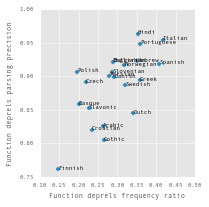

In [101]:
function_precision = lang_measures[['Function freq', 'F prec']]
function_precision.columns = ['Function deprels frequency ratio', 'Function deprels recall']

#from  scipy.stats import linregress
#linr = linregress(function_precision['Function deprels frequency ratio'], function_precision['Function deprels LAS'])

ax = function_precision.plot(kind='scatter', x='Function deprels frequency ratio', y='Function deprels recall', figsize=(3,3), fontsize=6)
#plt.plot(np.arange(0,0.6,0.1), (linr.slope*np.arange(0,0.6,0.1) + linr.intercept), '-')
plt.xlabel("Function deprels frequency ratio", fontsize=7)
plt.ylabel("Function deprels parsing precision", fontsize=7)
for lang, x, y in function_precision.itertuples():
    if lang == "Old_Church_Slavonic":
        lang = "Slavonic"
    ax.annotate(lang, (x, y), fontsize=6)

corr = function_precision.corr().ix[0,1]
print(corr)
plt.xlim(0.1, 0.5)
plt.ylim(0.75, 1.0)
#ax.annotate("R = {0:.2f}".format(corr), (0.12, 0.98))
plt.tight_layout()
plt.savefig("../paper/figures/function_ratio_vs_function_precision.pgf")

-0.331596899515


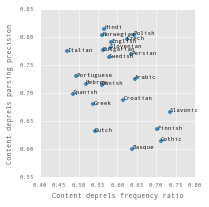

In [102]:
function_precision = lang_measures[['Content freq', 'C prec']]
content_precision.columns = ['Content deprels frequency ratio', 'Content deprels LAS']
ax = content_precision.plot(kind='scatter', x='Content deprels frequency ratio', y='Content deprels LAS', figsize=(3,3), fontsize=6)
plt.xlabel("Content deprels frequency ratio", fontsize=7)
plt.ylabel("Content deprels parsing precision", fontsize=7)
for lang, x, y in content_precision.itertuples():
    if lang == "Old_Church_Slavonic":
        lang = "Slavonic"
    ax.annotate(lang, (x, y), fontsize=6)
    
corr = content_precision.corr().ix[0,1]
print(corr)
#ax.annotate("$\\rho = {0:.2f}$".format(corr), (0.46, 0.84), size="x-large")
plt.tight_layout()
plt.savefig("../paper/figures/content_deprel_las_ratio_corr.pgf")